In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

snacks_df = pd.read_csv('./datasets/clean_snacks.csv', dtype={ 'client_id': str }, parse_dates=['date'], date_parser=dateparse)
snacks_df.head()

,office,warehouse,category,brand,product_id,flavor,client,point_of_sale,distributor,date,units,devolution_units,sale_amount,sale_discount,sale_devolution,incentive
0,Cali,Tulua,Producto De Extrusion,Cheetos,53407164,Tradicional,NaN,NaN,Tiendas,2014-04-01,324,0,181530.0,32675.40,-0.0,True
1,Nariño,Popayan,Producto De Extrusion,Cheetos,53407164,Tradicional,NaN,NaN,Tiendas,2014-04-01,36,0,20170.0,4437.40,-0.0,True
2,Nariño,Popayan,Producto De Extrusion,Cheetos,53102174,Tradicional,NaN,NaN,Tiendas,2014-04-01,73200,0,91227.0,20069.98,-0.0,False
3,Cali,Sur,Producto De Extrusion,Cheetos,53408215,Tradicional,NaN,NaN,Tiendas,2014-04-01,1080,0,605100.0,108918.43,-0.0,True
4,Cali,Norte,Producto De Extrusion,Cheetos,53408024,Tradicional,NaN,NaN,Superficies Menores,2014-04-01,100,40,73280.0,10992.00,29312.0,True


((array([-4.86541221, -4.68699444, -4.59057388, ...,  4.59057388,
          4.68699444,  4.86541221]),
  array([       0,        0,        0, ..., 13345200, 15644400, 19891152])),
 (22501.001058987524, 9556.823102673503, 0.2647837760758711))

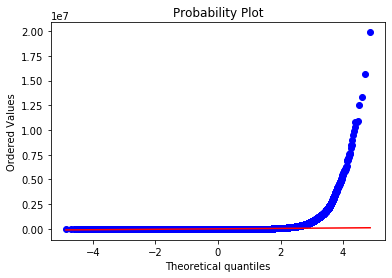

In [3]:
from scipy import stats

stats.probplot(snacks_df['units'], dist='norm', plot=plt)

((array([-4.85728147, -4.67857671, -4.58199275, ...,  4.58199275,
          4.67857671,  4.85728147]),
  array([ 1.38629436,  1.38629436,  1.38629436, ..., 16.40666733,
         16.56562358, 16.80578557])),
 (2.121083819256742, 6.320151523427162, 0.9869318156022983))

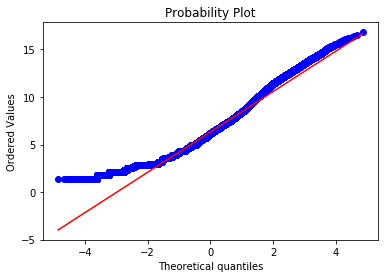

In [4]:
import numpy as np

stats.probplot(np.log(snacks_df[snacks_df['units'] > 0]['units']), dist='norm', plot=plt)

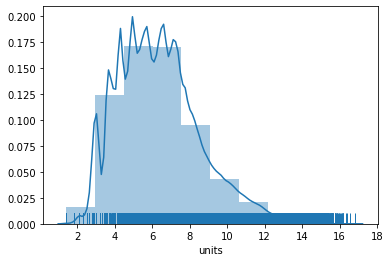

In [5]:
sns.distplot(np.log(snacks_df[snacks_df['units'] > 0]['units']), bins=10, rug=True)

In [11]:
# ofert percentage
def calculate_percentage(row):
    if row['sale_amount'] == 0:
        return 0
    return row['sale_devolution'] / row['sale_amount']

snacks_df['percentage'] = snacks_df.apply(calculate_percentage, axis = 1)

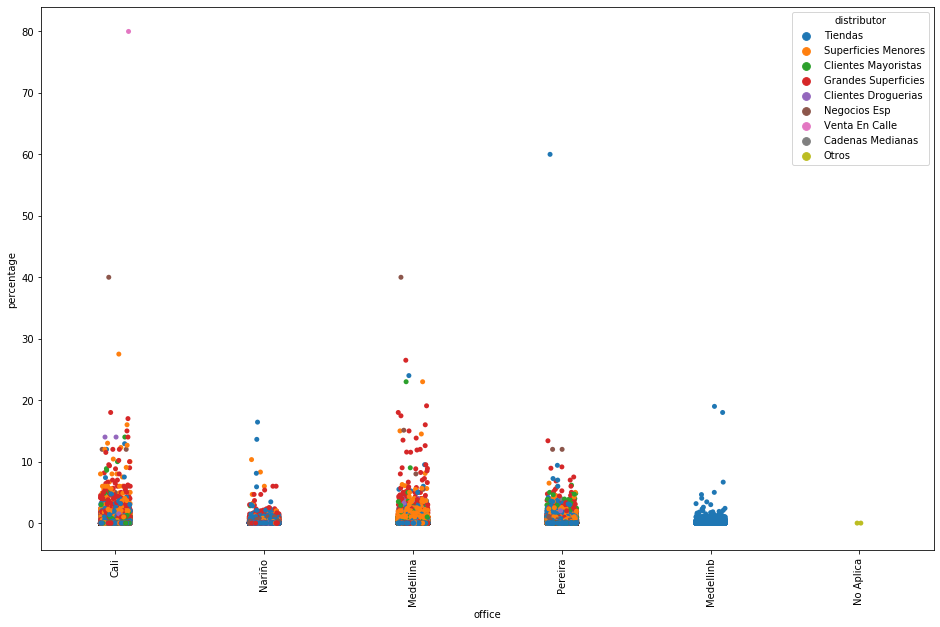

In [12]:
plt.figure(figsize=(16, 10))
ax = sns.stripplot(data=snacks_df, x='office', y='percentage', hue='distributor')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**Como es el manejo de las ofertas en las diferentes oficinas y distribuidores? esta relacionado con la cantidad de ventas?**

Es interesante porque nos muestra como se distribuyen las ofertas entre las diferentes oficinas, nos indica que las oficinas que mas venden son las que mas descuento suelen hacer, y los mas grandes, se detecta que a las tiendas suele hacerse un descuento pequeño comparado con los descuentos que se le haen a superficies menores y grandes superficies, tambien se identico que una oficina en particular le vende solo a tiendas.

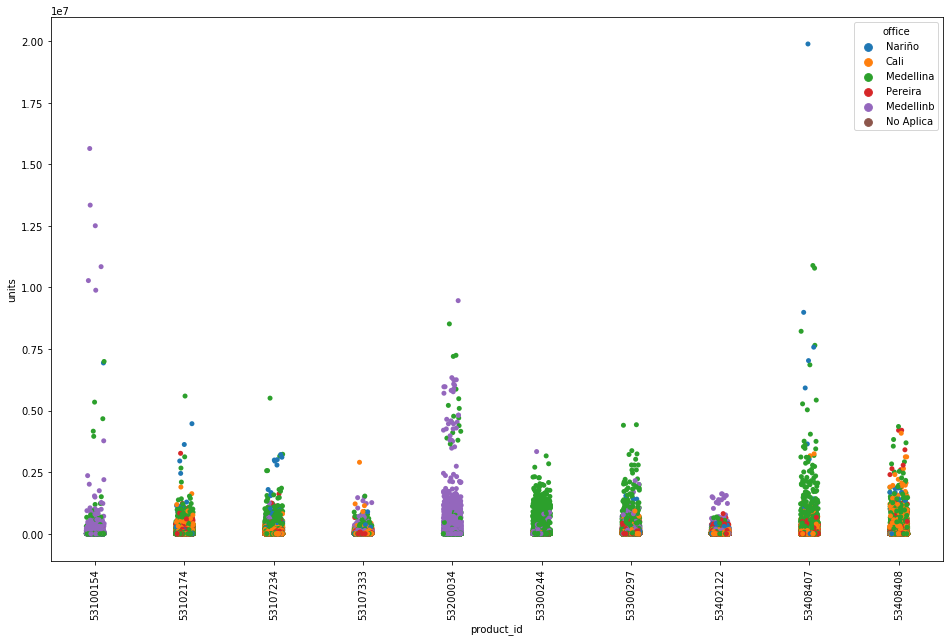

In [14]:
# 10 more saled products
products = snacks_df.groupby('product_id')['units'].sum().reset_index().sort_values('units', ascending=False).head(10)

plt.figure(figsize=(16, 10))
ax = sns.stripplot(data=snacks_df[snacks_df['product_id'].isin(products['product_id'])], x='product_id', y='units', hue='office')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Este gráfico es interesante para ver las ventas de los productos por oficina, podemos ver como unas oficinas tienen preferencia para algunos productos.

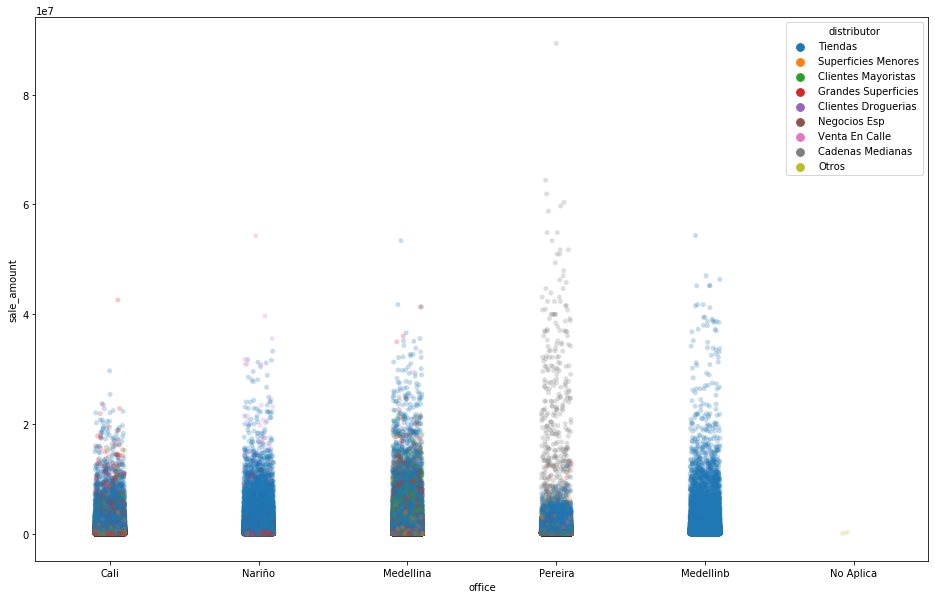

In [15]:
plt.figure(figsize=(16, 10))
sns.stripplot(data=snacks_df, x='office', y='sale_amount', hue='distributor', alpha=.25)

**Como se comportan las ventas de los diferentes distribuidores en las oficinas?**

Esta me parece muy buena porque muestra como las oficinas venden de acuerdo a los distribuidores y se puede observar como diferentes distribuidores tienen diferentes distribuciones de compra.

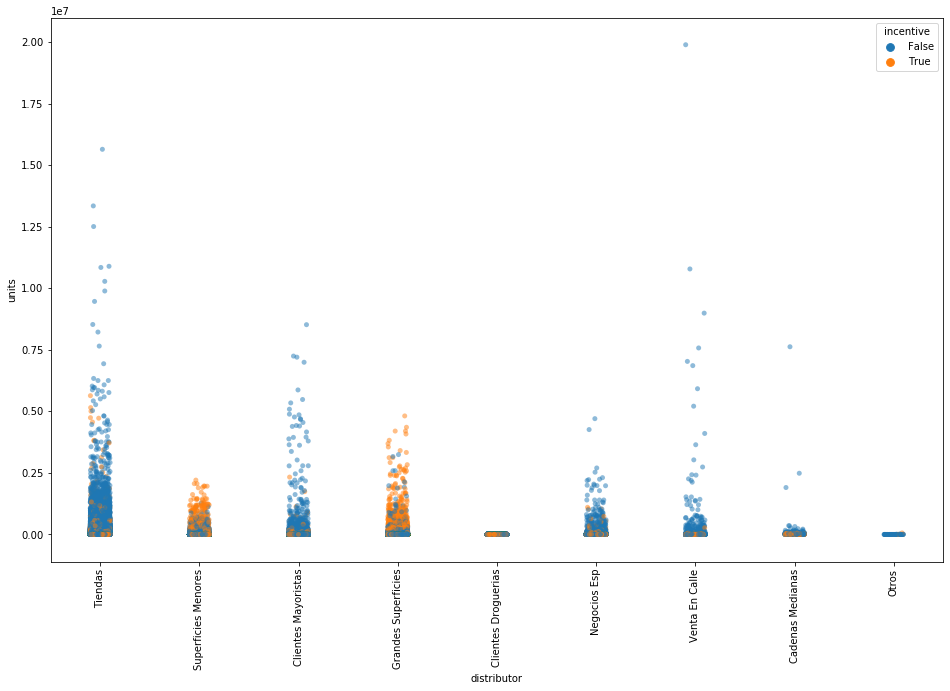

In [18]:
plt.figure(figsize=(16, 10))
ax = sns.stripplot(data=snacks_df, x='distributor', y='units', hue='incentive', alpha=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**TODO: Este puede ser un grafico que tenga mas sentido como un stacked...**

**Los productos de tipo ofertado mejora las ventas?**

Se puede analizar en este grafico que hay una relacion entre los productos ofertados y los distribuidores de superficies menores con grandes superficies, al parecer la distribución muestra que este tipo de distribuidor compra más productos ofertados, como si hubiera un tipo de negocio especial para este tipo de distribuidores.

Si lo comparamos con el char igual pero en vez de unidades se pone el sale, podemos corroborar que no implica para la empresa ventas mas altas, parece que las ventas se comportan muy parecido a las no ofertadas.

In [20]:
snacks_df.head(1)

,office,warehouse,category,brand,product_id,flavor,client,point_of_sale,distributor,date,units,devolution_units,sale_amount,sale_discount,sale_devolution,incentive,percentage
0,Cali,Tulua,Producto De Extrusion,Cheetos,53407164,Tradicional,NaN,NaN,Tiendas,2014-04-01,324,0,181530.0,32675.4,-0.0,True,-0.0


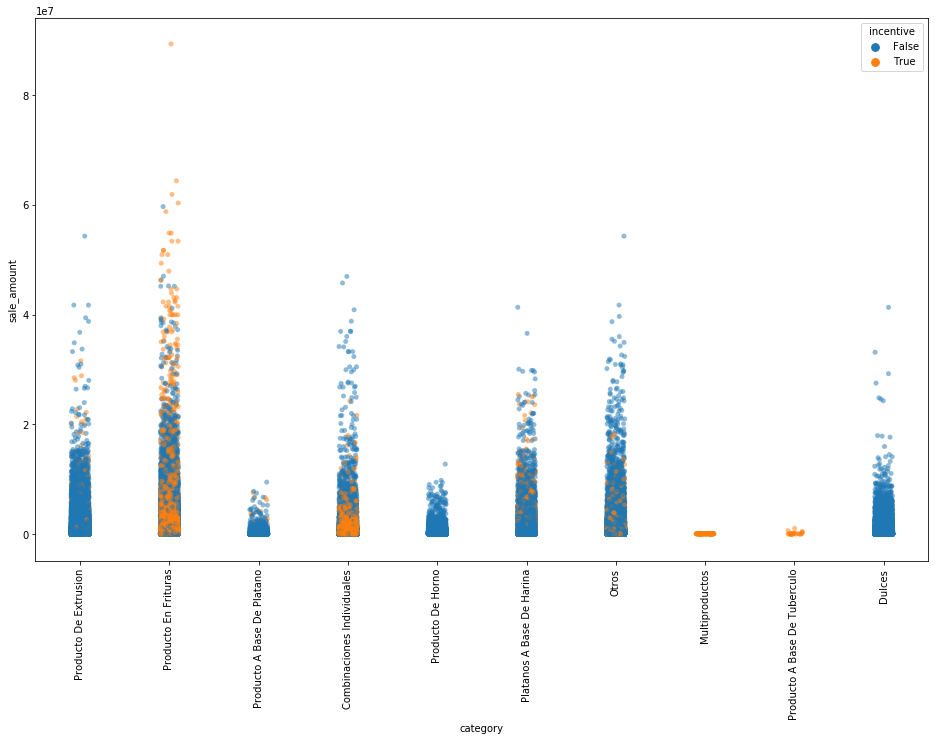

In [21]:
plt.figure(figsize=(16, 10))
ax = sns.stripplot(data=snacks_df, x='category', y='sale_amount', hue='incentive', alpha=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [23]:
snacks_df.head(1)

,office,warehouse,category,brand,product_id,flavor,client,point_of_sale,distributor,date,units,devolution_units,sale_amount,sale_discount,sale_devolution,incentive,percentage
0,Cali,Tulua,Producto De Extrusion,Cheetos,53407164,Tradicional,NaN,NaN,Tiendas,2014-04-01,324,0,181530.0,32675.4,-0.0,True,-0.0


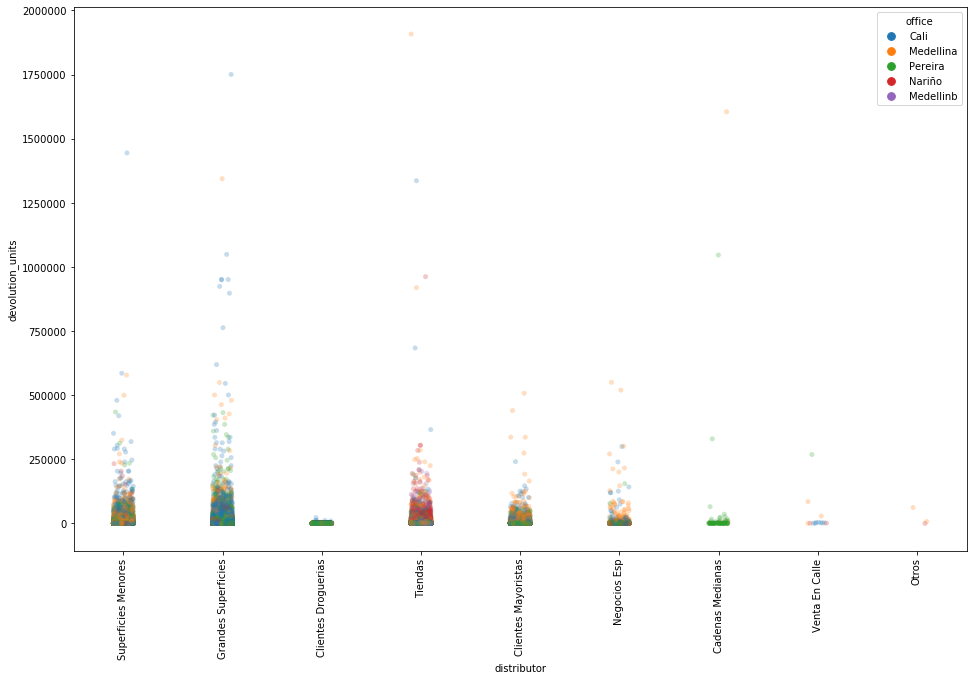

In [24]:
# devolutions
plt.figure(figsize=(16, 10))
ax = sns.stripplot(data=snacks_df[snacks_df['devolution_units'] > 0], x='distributor', y='devolution_units', hue='office', alpha=.25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**TODO: Probar stacked bar para este tambien**
**Como los diferentes distribuidores se comportan en devoluciones de producto?**

Es interesante ver que las grandes superficies tienden a devolver mayores cantidades

In [27]:
snacks_df['client'] = snacks_df['client'].fillna('OTRO')

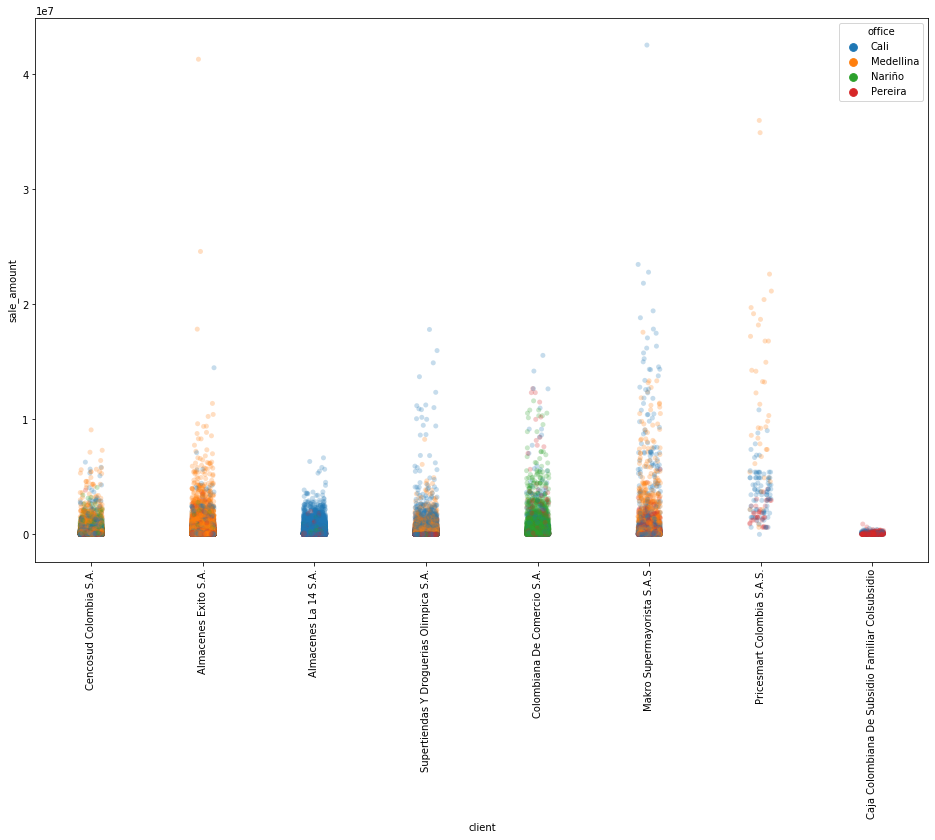

In [28]:
plt.figure(figsize=(16, 10))
ax = sns.stripplot(data=snacks_df[snacks_df['client'] != 'OTRO'], x='client', y='sale_amount', hue='office', alpha=.25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Todos los clientes tiene descripciones como las de arriba, eso que quiere decir?

In [30]:
snacks_df[snacks_df['warehouse'].isna()].isna().sum()

office              0
warehouse           0
category            0
brand               0
product_id          0
flavor              0
client              0
point_of_sale       0
distributor         0
date                0
units               0
devolution_units    0
sale_amount         0
sale_discount       0
sale_devolution     0
incentive           0
percentage          0
dtype: int64

In [32]:
snacks_df[snacks_df['category'].isna() & snacks_df['warehouse'].notnull()].isna().sum()

office              0
warehouse           0
category            0
brand               0
product_id          0
flavor              0
client              0
point_of_sale       0
distributor         0
date                0
units               0
devolution_units    0
sale_amount         0
sale_discount       0
sale_devolution     0
incentive           0
percentage          0
dtype: int64

In [36]:
import numpy as np
np.nan

nan

In [38]:
snacks_df[snacks_df['client'].isna() & snacks_df['devolution_units'] > 0].shape

(0, 17)

---

In [39]:
import plotly.express as px

data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()

In [45]:
top_5_brands = snacks_df.groupby('brand')['sale_amount'].sum().reset_index().sort_values('sale_amount', ascending=False).head()

# fig = px.bar(top_5_brands, x='brand', y='sale_amount')
# fig.show()

# bars = [
#     go.Bar(name=bar, x=animals, y=[20, 14, 23]),
#     for bar in top_5_brands['brand']
# ]

# fig = go.Figure(data=[
#     go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23]),
#     go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])
# ])
# # Change the bar mode
# fig.update_layout(barmode='stack')
# fig.show()